In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier



# Data import/Manipulation 

In [2]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
df = pd.read_csv("data/anime_cleaned.csv", usecols=['title','type','source','episodes','rating', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
df_number_set = pd.read_csv("data/anime_cleaned.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
display(df)
display(df_number_set)

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,Dokidoki Little Ooyasan,OVA,Other,0,Rx - Hentai,9.52,33,NaN,10273,357,21,30.0,2018.0
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396.0,14066,49,1,2.0,2013.0


,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,12,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,26,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,51,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,38,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,25,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...
6663,0,9.52,33,NaN,10273,357,21,30.0,2018.0
6664,1,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,1,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,0,4.57,7,11396.0,14066,49,1,2.0,2013.0


In [3]:
df.describe(include = "all")

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668,6668,6668,6668.000000,6668,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
unique,6668,6,15,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ling Yu 4th Season,TV,Manga,NaN,PG-13 - Teens 13 or older,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2980,2493,NaN,3396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.276395,NaN,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,NaN,NaN,NaN,40.906929,NaN,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,NaN,NaN,NaN,1.000000,NaN,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,NaN,NaN,NaN,6.000000,NaN,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,NaN,NaN,NaN,13.000000,NaN,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000


In [4]:
df.isnull().sum()

title                0
type                 0
source               0
episodes             0
rating               0
score                0
scored_by            0
rank               356
popularity           0
members              0
favorites            0
duration_min         0
aired_from_year      0
dtype: int64

In [5]:
# dropping all null values
df.dropna(inplace = True) 


In [6]:
df

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,24.0,2012.0
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,24.0,2007.0
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508.0,1173,70127,802,24.0,2008.0
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,16.0,2002.0
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126.0,12779,126,0,13.0,2016.0
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719.0,10168,384,1,0.0,2018.0
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253.0,14257,37,0,35.0,2015.0
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396.0,14066,49,1,2.0,2013.0


In [7]:
def change_column_dtype(columns_to_transform,type):
    df[columns_to_transform] = df[columns_to_transform].astype(type)

    return df.dtypes

df.dtypes

title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank               float64
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year    float64
dtype: object

In [8]:
change_column_dtype(['rank','aired_from_year'],int)


title               object
type                object
source              object
episodes             int64
rating              object
score              float64
scored_by            int64
rank                 int32
popularity           int64
members              int64
favorites            int64
duration_min       float64
aired_from_year      int32
dtype: object

## Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [9]:
df

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


In [10]:
# copy dataframe to replace with dummies columns
df_backup = df.copy()
df_backup

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,Manga,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,TV,Manga,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,TV,Manga,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,TV,Original,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,TV,Manga,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,Novel,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,ONA,Picture book,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


### LabelEncode column ['source']

In [11]:
le = preprocessing.LabelEncoder()
# Created dummies for source column
df_copy = df.copy()
le.fit(df_copy.source)
df_copy.source = le.fit_transform(df_copy.source)


# Made tuple for graphing labels instead of numerical data
df_list_source = list(le.classes_)          # df.source.unique()
print(df_list_source[0] == list(le.inverse_transform([0])),'\n')
df_list_source

False 



['4-koma manga',
 'Book',
 'Card game',
 'Digital manga',
 'Game',
 'Light novel',
 'Manga',
 'Music',
 'Novel',
 'Original',
 'Other',
 'Picture book',
 'Radio',
 'Visual novel',
 'Web manga']

In [12]:
# df_list_source[0] == list(le.inverse_transform([0]))

In [13]:
# Auto encodes any categorical column in a dataframe to numerical values.

def dummyEncode_column(column):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[f'{column.name}'] = le.fit_transform(df[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)
    
    print(f'After passing column ["{column.name}"] through LabelEncoder(): \n')
    
    for i in range(0,len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')   
    
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])
    
    display(df)


In [14]:
dummyEncode_column(df.source)

After passing column ["source"] through LabelEncoder(): 

Categorical value ['4-koma manga'] is replaced with numerical value [0]
Categorical value ['Book'] is replaced with numerical value [1]
Categorical value ['Card game'] is replaced with numerical value [2]
Categorical value ['Digital manga'] is replaced with numerical value [3]
Categorical value ['Game'] is replaced with numerical value [4]
Categorical value ['Light novel'] is replaced with numerical value [5]
Categorical value ['Manga'] is replaced with numerical value [6]
Categorical value ['Music'] is replaced with numerical value [7]
Categorical value ['Novel'] is replaced with numerical value [8]
Categorical value ['Original'] is replaced with numerical value [9]
Categorical value ['Other'] is replaced with numerical value [10]
Categorical value ['Picture book'] is replaced with numerical value [11]
Categorical value ['Radio'] is replaced with numerical value [12]
Categorical value ['Visual novel'] is replaced with numerical

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,TV,6,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,TV,6,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,TV,6,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,TV,9,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,TV,6,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,ONA,8,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),ONA,9,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,OVA,9,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,ONA,11,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


### LabelEncode column ['type']

In [15]:
dummyEncode_column(df.type)

After passing column ["type"] through LabelEncoder(): 

Categorical value ['Movie'] is replaced with numerical value [0]
Categorical value ['Music'] is replaced with numerical value [1]
Categorical value ['ONA'] is replaced with numerical value [2]
Categorical value ['OVA'] is replaced with numerical value [3]
Categorical value ['Special'] is replaced with numerical value [4]
Categorical value ['TV'] is replaced with numerical value [5]

[df_type_categories] =  ['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']


,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,PG-13 - Teens 13 or older,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,PG-13 - Teens 13 or older,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,PG - Children,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,PG-13 - Teens 13 or older,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,PG-13 - Teens 13 or older,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,8,12,PG-13 - Teens 13 or older,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,9,1,PG-13 - Teens 13 or older,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,G - All Ages,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,11,0,G - All Ages,4.57,7,11396,14066,49,1,2.0,2013


In [16]:
# # Created dummies for type column
# le.fit(df.type)
# df.type = le.fit_transform(df.type)
# # le.fit_transform(df.type)


# # Made tuple for graphing labels instead of numerical data
# df_list_type = list(le.classes_)                           # df.type.unique()

# print(list(le.classes_))

# print(list(le.inverse_transform([0,1,2,3,4,5])))

### LabelEncode column ['rating']

In [17]:
dummyEncode_column(df.rating)

After passing column ["rating"] through LabelEncoder(): 

Categorical value ['G - All Ages'] is replaced with numerical value [0]
Categorical value ['None'] is replaced with numerical value [1]
Categorical value ['PG - Children'] is replaced with numerical value [2]
Categorical value ['PG-13 - Teens 13 or older'] is replaced with numerical value [3]
Categorical value ['R - 17+ (violence & profanity)'] is replaced with numerical value [4]
Categorical value ['R+ - Mild Nudity'] is replaced with numerical value [5]
Categorical value ['Rx - Hentai'] is replaced with numerical value [6]

[df_rating_categories] =  ['G - All Ages', 'None', 'PG - Children', 'PG-13 - Teens 13 or older', 'R - 17+ (violence & profanity)', 'R+ - Mild Nudity', 'Rx - Hentai']


,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,3,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,3,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,2,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,3,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,8,12,3,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,9,1,3,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,0,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,11,0,0,4.57,7,11396,14066,49,1,2.0,2013


In [18]:
# Created dummies for rating column
le.fit(df.rating)
df.rating = le.fit_transform(df.rating)


# Made tuple for graphing labels instead of numerical data
df_list_rating = list(le.classes_)                   # df.rating.unique()

In [19]:
df_list_rating

[0, 1, 2, 3, 4, 5, 6]

In [20]:
df

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,3,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,3,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,2,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,3,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,Ling Yu 4th Season,2,8,12,3,7.53,17,11126,12779,126,0,13.0,2016
6664,Wo Shi Jiang Xiaobai (2018),2,9,1,3,0.00,0,12719,10168,384,1,0.0,2018
6665,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,0,4.20,5,10253,14257,37,0,35.0,2015
6666,Mr. Men Little Miss,2,11,0,0,4.57,7,11396,14066,49,1,2.0,2013


## Correlation

In [21]:

df_predictors = df.iloc[:,1:-1]
corr= df_predictors.corr()
corr

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,1.000000,-0.029381,0.237192,0.114962,0.061996,0.146847,-0.062197,-0.195254,0.179783,0.105838,-0.548018
source,-0.029381,1.000000,-0.015172,-0.065669,-0.155177,-0.047142,0.169341,0.135183,-0.050129,-0.000246,-0.046960
episodes,0.237192,-0.015172,1.000000,-0.085536,0.073116,0.063172,-0.049064,-0.005915,0.073563,0.104417,-0.107056
rating,0.114962,-0.065669,-0.085536,1.000000,0.267665,0.194191,-0.310402,-0.505422,0.219982,0.088242,0.093910
score,0.061996,-0.155177,0.073116,0.267665,1.000000,0.382646,-0.898747,-0.691818,0.416384,0.257017,0.303784
scored_by,0.146847,-0.047142,0.063172,0.194191,0.382646,1.000000,-0.356686,-0.424704,0.987066,0.794090,0.045479
rank,-0.062197,0.169341,-0.049064,-0.310402,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528
popularity,-0.195254,0.135183,-0.005915,-0.505422,-0.691818,-0.424704,0.777302,1.000000,-0.474118,-0.210061,-0.159520
members,0.179783,-0.050129,0.073563,0.219982,0.416384,0.987066,-0.391524,-0.474118,1.000000,0.781962,0.038604
favorites,0.105838,-0.000246,0.104417,0.088242,0.257017,0.794090,-0.208503,-0.210061,0.781962,1.000000,0.002212


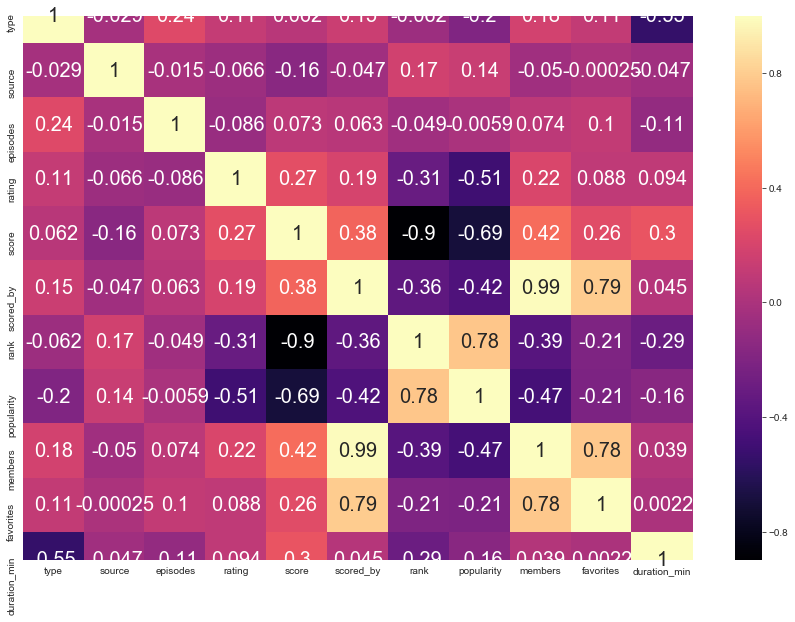

In [22]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='magma')


In [23]:
# Checking correlations in data where the correlation is greater then 75% (highly correlated)
corr[abs(df_predictors.corr() > 0.75)]

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.987066,0.794090,NaN
rank,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.777302,NaN,NaN,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,0.777302,1.000000,NaN,NaN,NaN
members,NaN,NaN,NaN,NaN,NaN,0.987066,NaN,NaN,1.000000,0.781962,NaN
favorites,NaN,NaN,NaN,NaN,NaN,0.794090,NaN,NaN,0.781962,1.000000,NaN


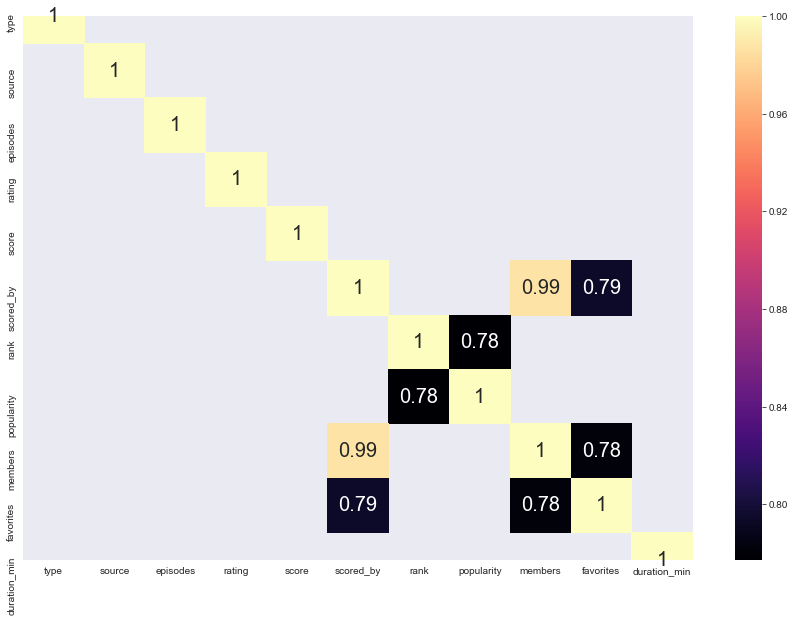

In [24]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr[abs(df_predictors.corr() > 0.75)], annot = True, annot_kws ={'size':20}, cmap='magma')

In [25]:
# Checking correlations in data where the correlation is less then -75% (highly inversely correlated)
corr[abs(df_predictors.corr() < -0.75)] 

,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,NaN,NaN,NaN,NaN,NaN,NaN,-0.898747,NaN,NaN,NaN,NaN
scored_by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank,NaN,NaN,NaN,NaN,-0.898747,NaN,NaN,NaN,NaN,NaN,NaN
popularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
members,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


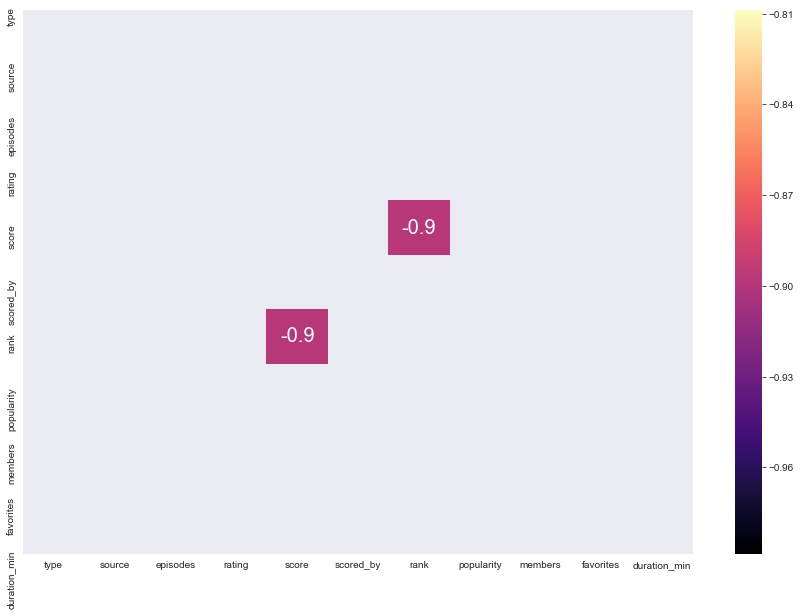

In [26]:
# Graphed the correlation matrix using a heat map (easier to read)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr[abs(df_predictors.corr() < -0.75)] , annot = True, annot_kws ={'size':20}, cmap='magma')

### OLM for rank~score

In [27]:
abs(corr).sort_values(by = 'rank',  ascending= False)['rank']
data_reg_simple = ols(formula= "rank~score", data=df).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 2.651e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:16:38   Log-Likelihood:                -54637.
No. Observations:                6312   AIC:                         1.093e+05
Df Residuals:                    6310   BIC:                         1.093e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.514e+04    128.987    194.868      0.000    2.49e+04    2.54e+04
score      -3031.4230     18.618   -162.822      0.000   -3067.921   -2994.925
==============================================================================
Omnibus:                     3194.389   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177636.065
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      28.779   Cond. No.                         52.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLM for popularity~rank

In [28]:
abs(corr).sort_values(by = 'popularity',  ascending= False)['popularity']
data_reg_simple = ols(formula= "popularity~rank", data=df).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     9632.
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:16:38   Log-Likelihood:                -57585.
No. Observations:                6312   AIC:                         1.152e+05
Df Residuals:                    6310   BIC:                         1.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    699.3556     47.238     14.805      0.000     606.754     791.957
rank           0.8642      0.009     98.145      0.000       0.847       0.881
==============================================================================
Omnibus:                        0.520   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.519
Skew:                           0.022   Prob(JB):                        0.772
Kurtosis:                       2.998   Cond. No.                     9.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for score~popularity

In [29]:
abs(corr).sort_values(by = 'score',  ascending= False)['score']
data_reg_simple = ols(formula= "score~popularity", data=df).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     5792.
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:16:38   Log-Likelihood:                -6510.2
No. Observations:                6312   AIC:                         1.302e+04
Df Residuals:                    6310   BIC:                         1.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6830      0.014    559.150      0.000       7.656       7.710
popularity    -0.0002   2.42e-06    -76.107      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     1510.313   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7590.225
Skew:                          -1.062   Prob(JB):                         0.00
Kurtosis:                       7.935   Cond. No.                     9.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for members~scored_by

In [30]:
abs(corr).sort_values(by = 'members',  ascending= False)['members']
data_reg_simple = ols(formula= "members~scored_by", data=df).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                members   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 2.392e+05
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:16:38   Log-Likelihood:                -70531.
No. Observations:                6312   AIC:                         1.411e+05
Df Residuals:                    6310   BIC:                         1.411e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7021.2227    234.020     30.003      0.000    6562.463    7479.982
scored_by      1.6961      0.003    489.098      0.000       1.689       1.703
==============================================================================
Omnibus:                     2598.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           592802.892
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                      50.450   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the relationships between the different categories

Visualizing relationship with each column of my dataset

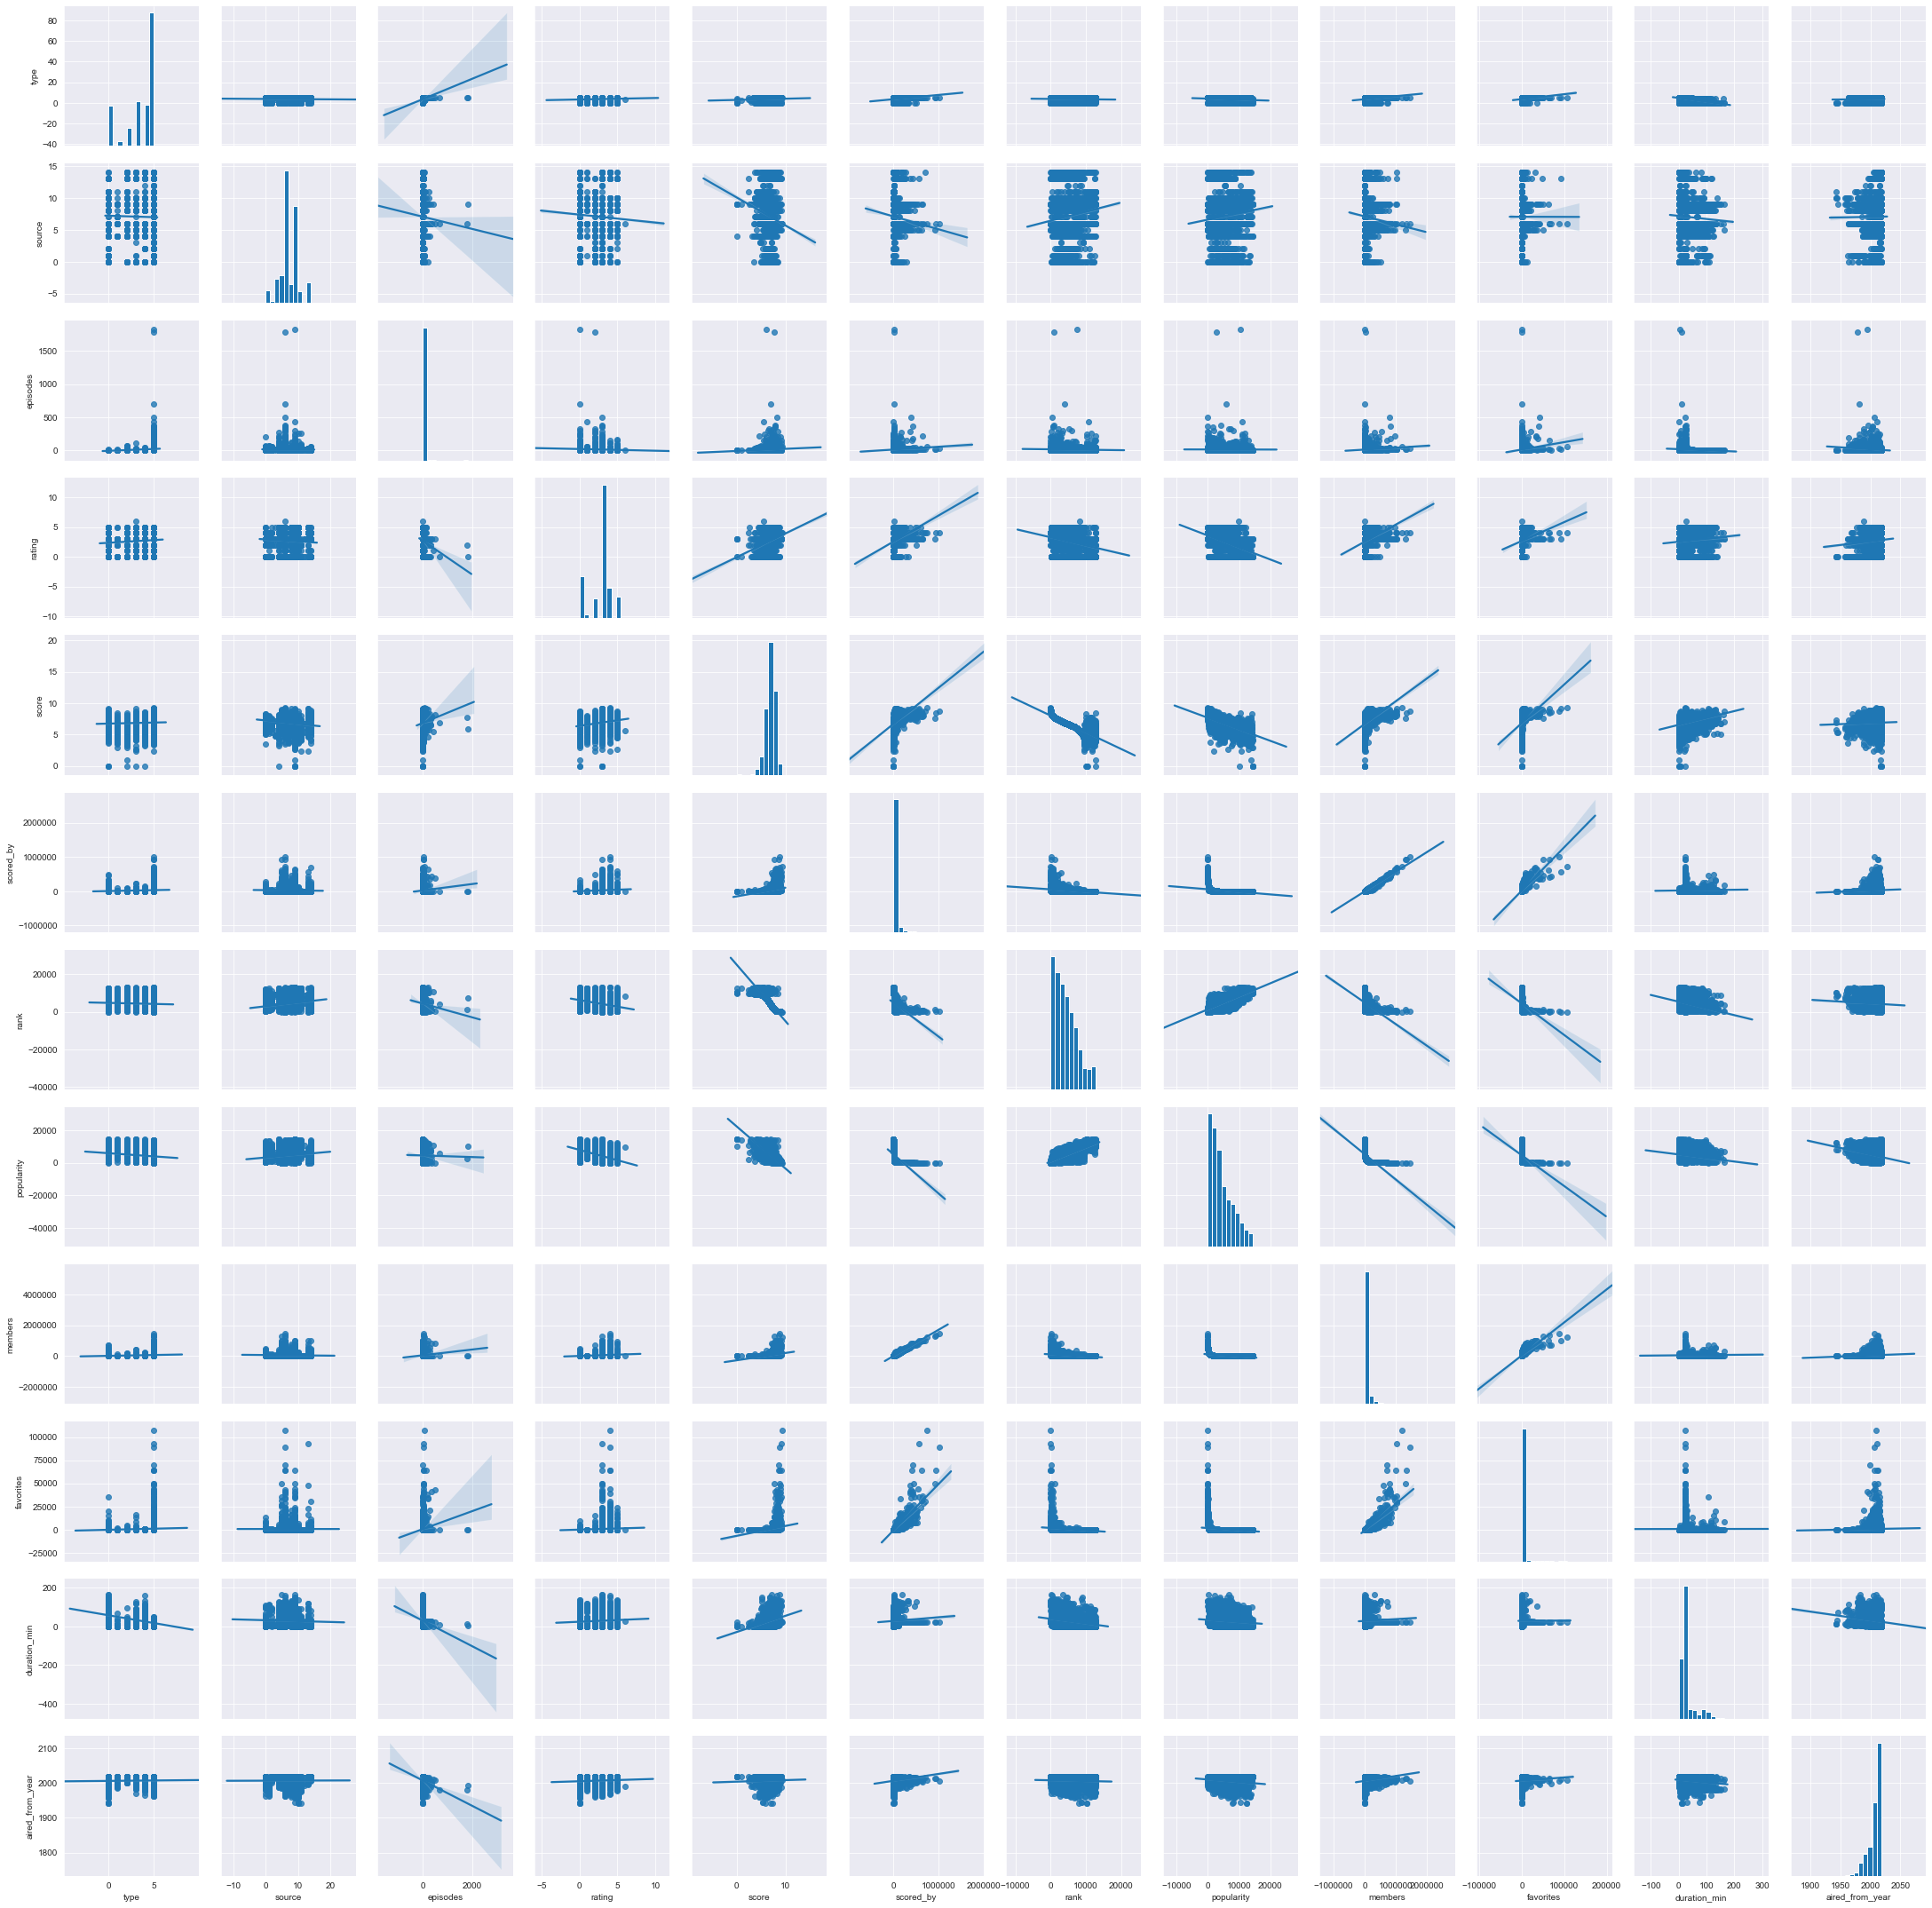

In [31]:
sns.pairplot(df, kind='reg' )

In [32]:
# sns.pairplot(df, hue ='type')

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


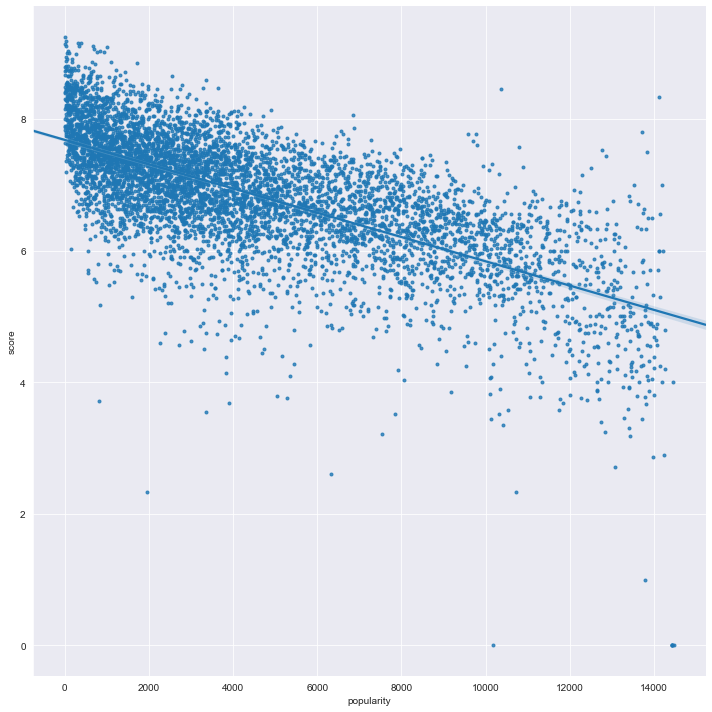

In [33]:

sns.lmplot(x='popularity', y='score', data= df, markers=[ "."], fit_reg =True,size = 10)


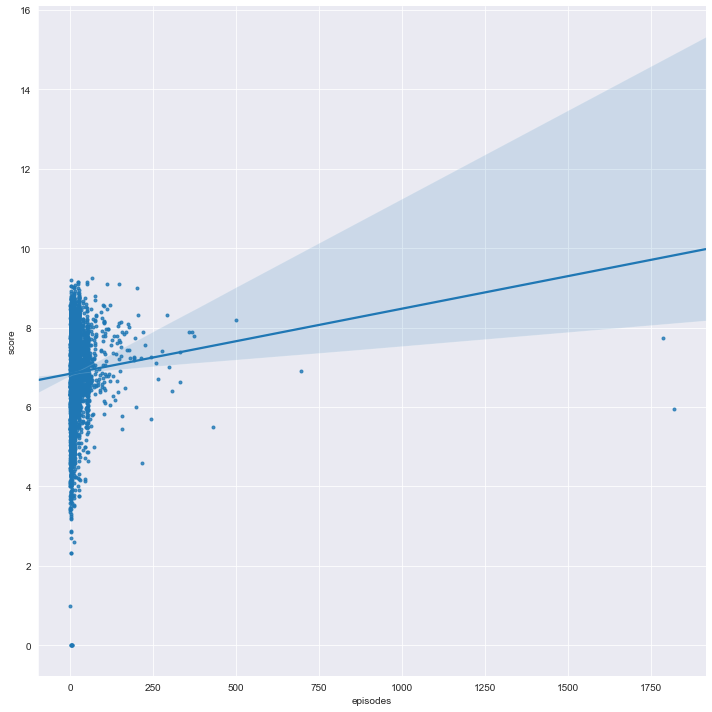

In [34]:
sns.lmplot(x='episodes', y='score', data= df, markers=[ "."], fit_reg =True,size = 10)

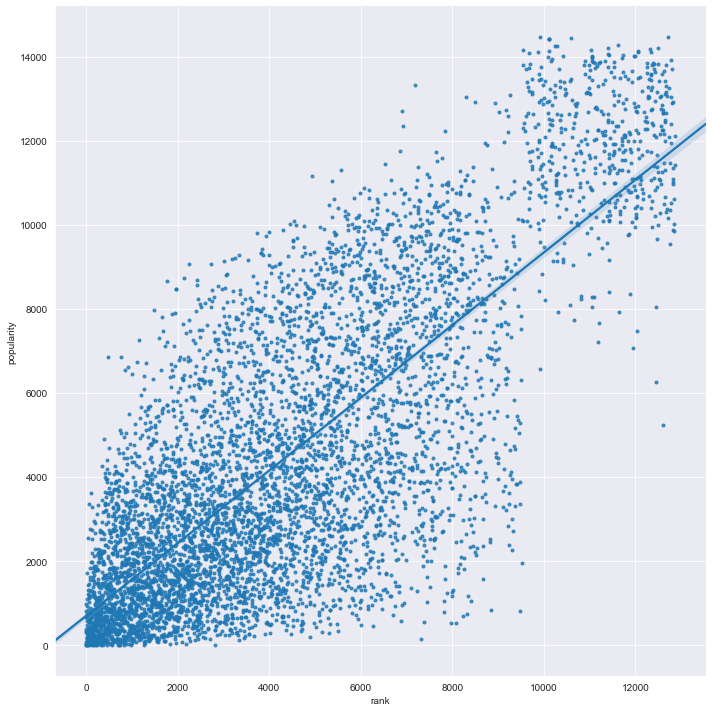

In [35]:
sns.lmplot(x='rank', y='popularity', data= df, markers=["."], fit_reg =True,size = 10)

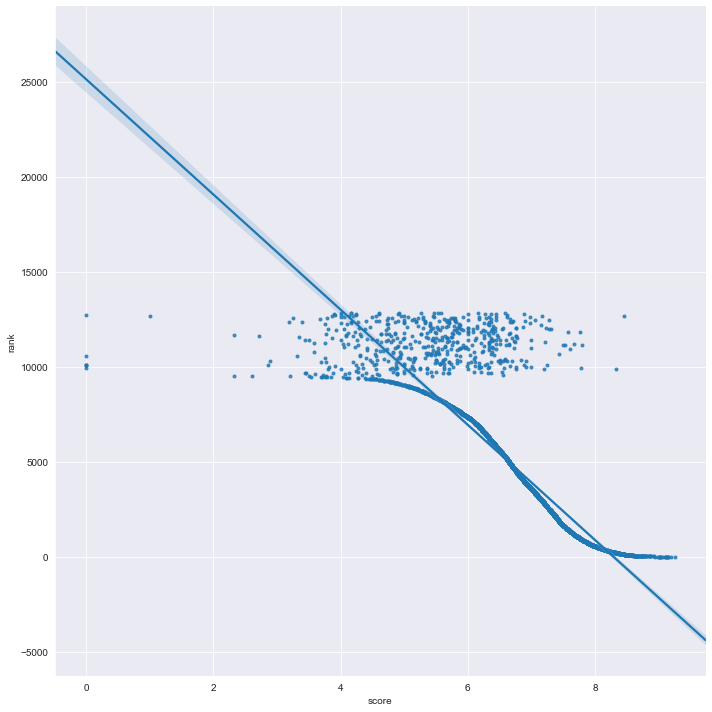

In [36]:
sns.lmplot(x='score', y='rank', data= df, markers=[ "."], fit_reg =True,size = 10)

Box plot of the relationship for type against rank and score

([<matplotlib.axis.XTick at 0x1a79a200048>,
 <a list of 6 Text xticklabel objects>)

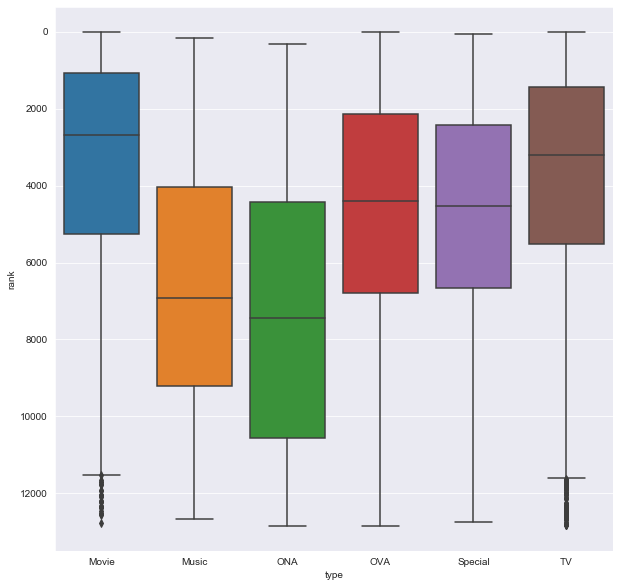

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, x='type' ,y= 'rank', orient='v')
plt.gca().invert_yaxis()
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

([<matplotlib.axis.XTick at 0x1a79acc3348>,
 <a list of 6 Text xticklabel objects>)

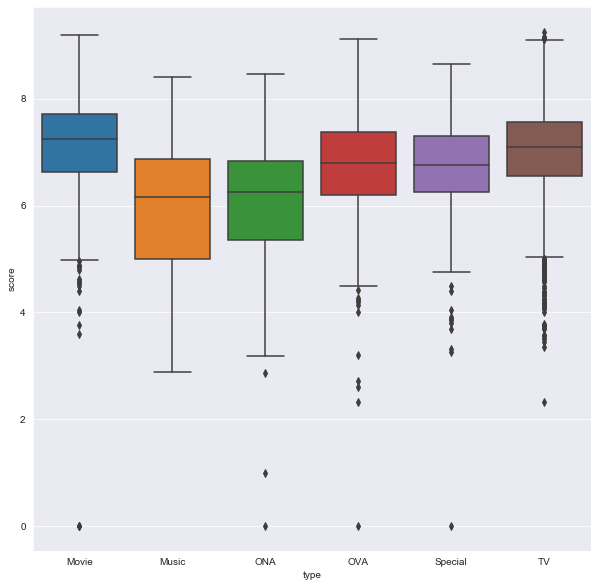

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df, x='type' ,y= 'score', orient='v', )
plt.xticks(np.arange(6), ('Movie', 'Music', 'ONA', 'OVA', 'Special','TV'))

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

([<matplotlib.axis.XTick at 0x1a79a9e5088>,
 <a list of 15 Text xticklabel objects>)

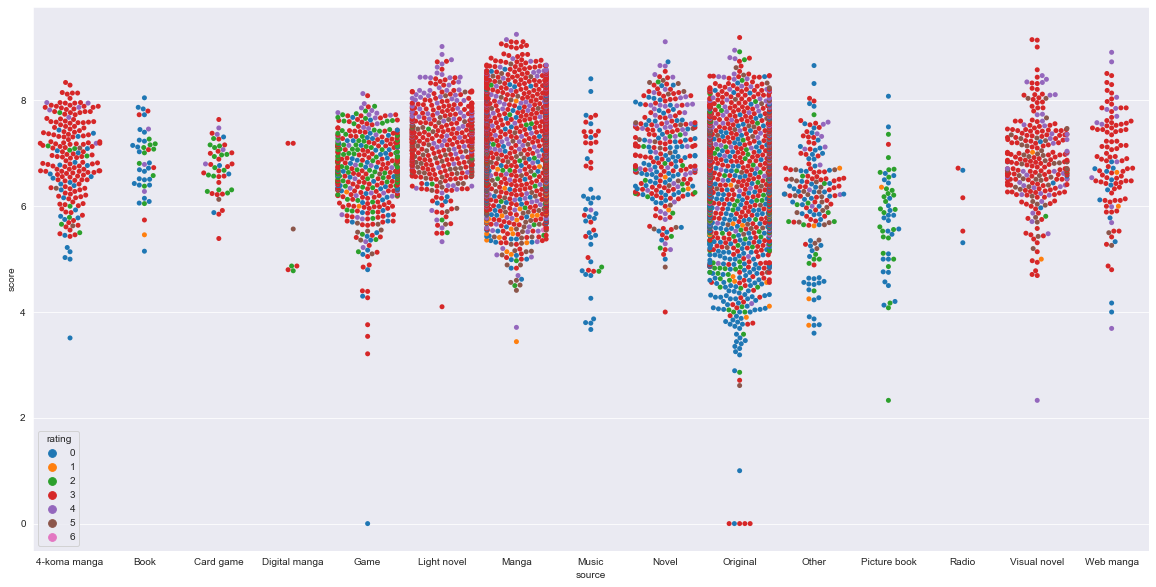

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=df, x='source' ,y= 'score', size=5, orient='v', hue='rating')
plt.xticks(np.arange(len(df_list_source)), df_list_source)


In [40]:
df.columns

Index(['title', 'type', 'source', 'episodes', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'duration_min',
       'aired_from_year'],
      dtype='object')

C:\Users\sdman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sdman\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


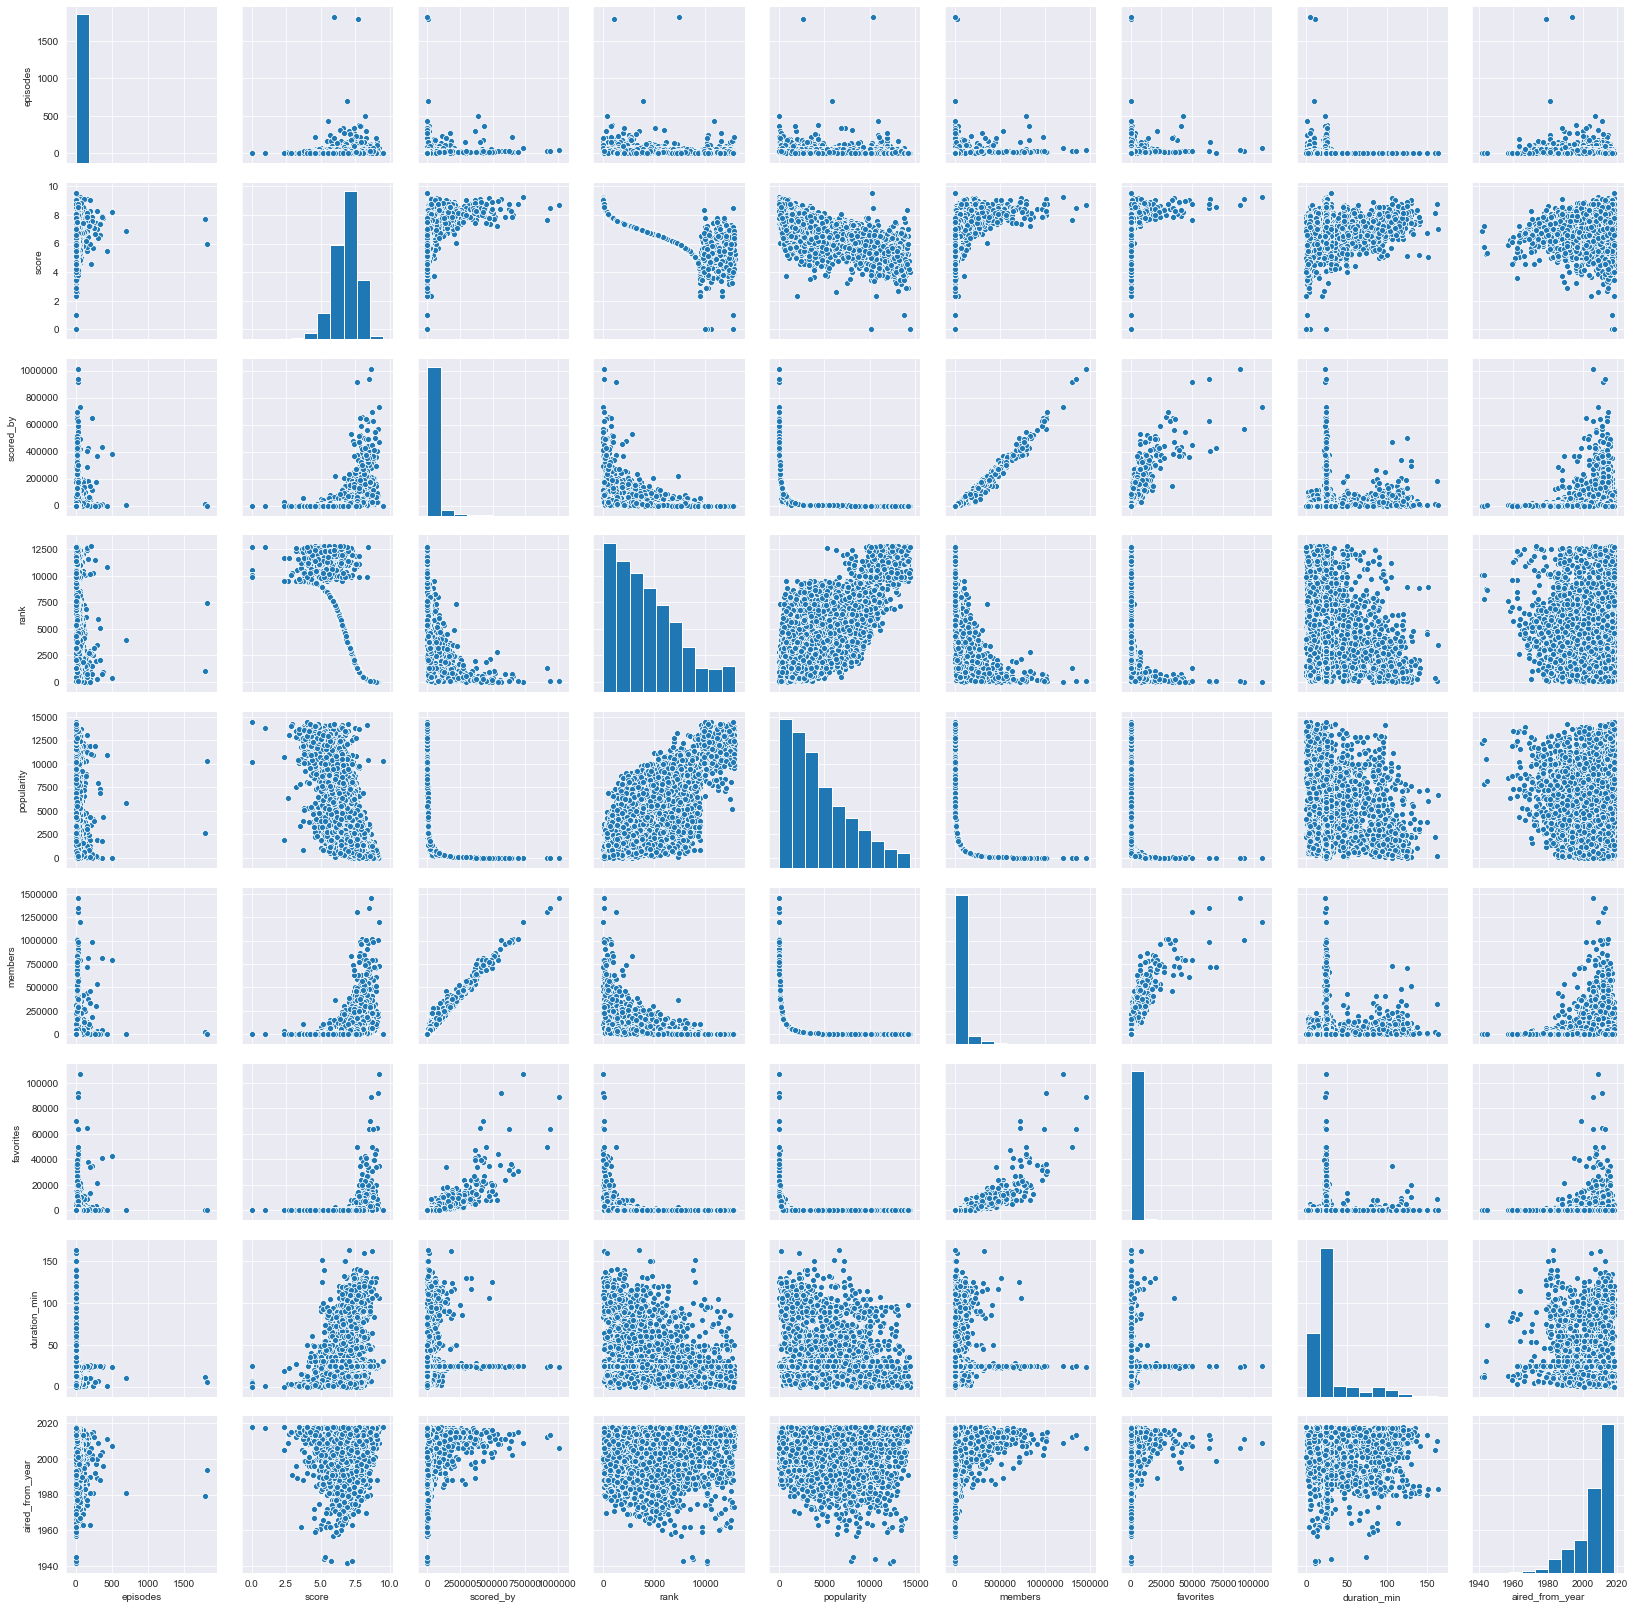

In [41]:
sns.pairplot(df_number_set)

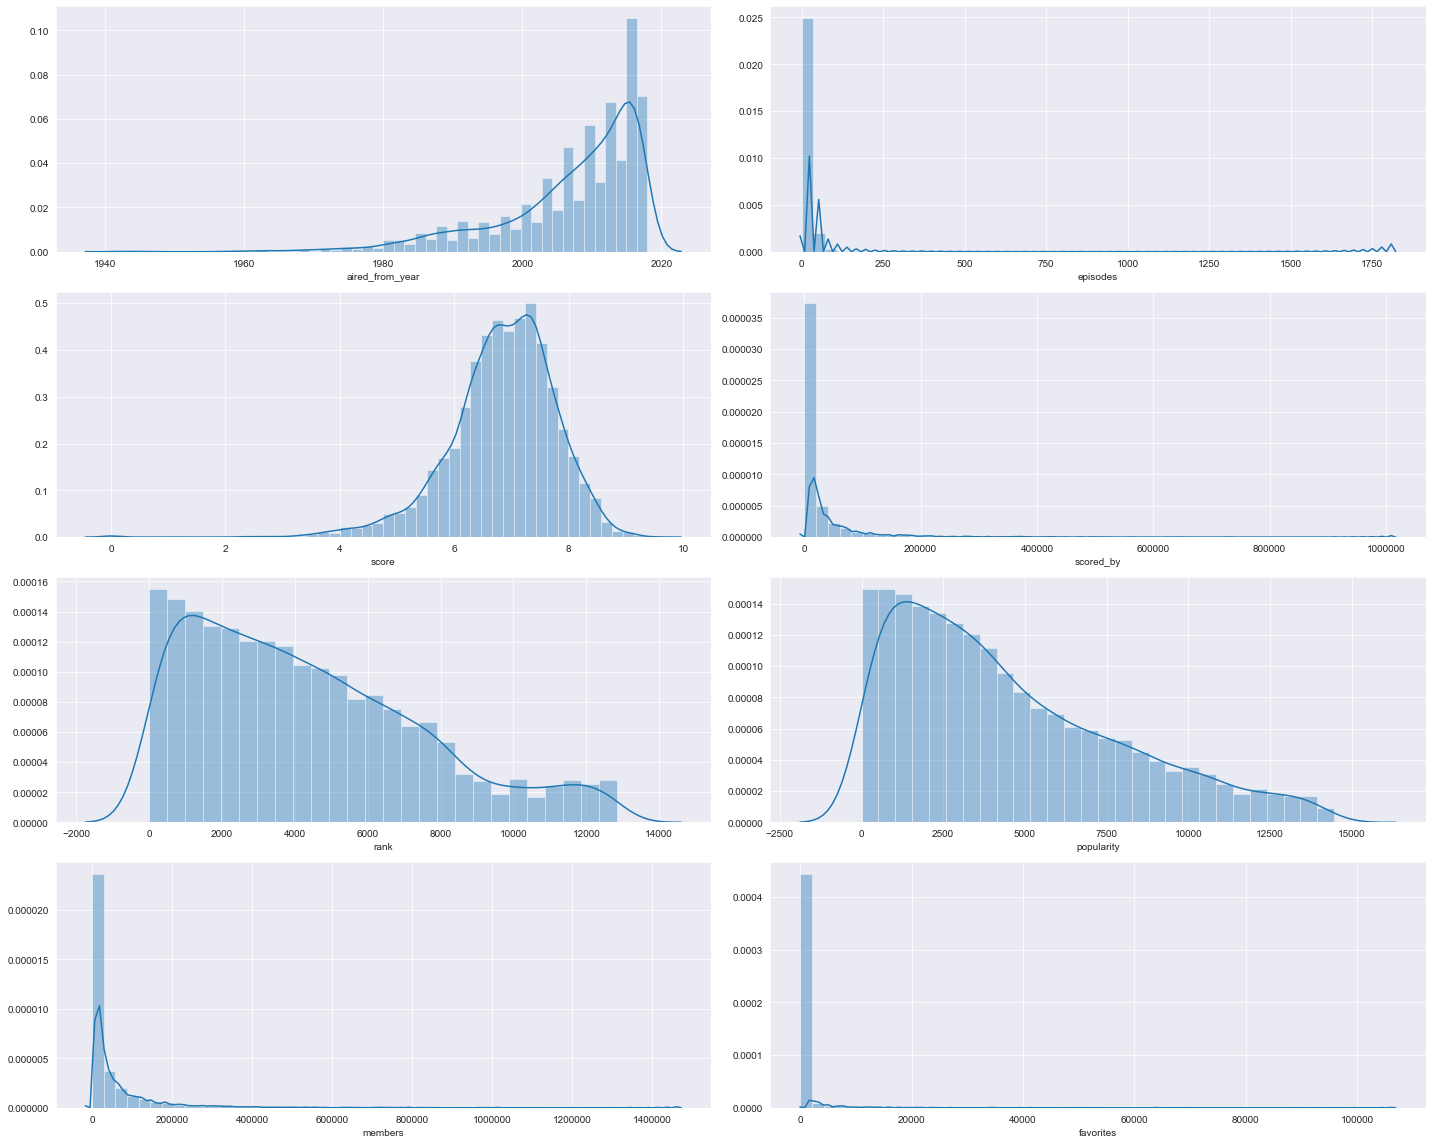

In [42]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = df_number_set.columns.dropna()
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df_number_set[col[index]].dropna(how='all'), ax = ax[i][j])
        index = index + 1
plt.tight_layout()

### This pairing showed the highest correlation

# Total # of Scores vs Total # of Members

In [43]:
cols = df.columns
for index,x in enumerate(cols):
    print(f'{index} = column {x}')

0 = column title
1 = column type
2 = column source
3 = column episodes
4 = column rating
5 = column score
6 = column scored_by
7 = column rank
8 = column popularity
9 = column members
10 = column favorites
11 = column duration_min
12 = column aired_from_year


In [44]:
#selecting the columns in the data and labeling them 
score=df.iloc[:,5]
score_by=df.iloc[:,6]
rank=df.iloc[:,7]
popularity=df.iloc[:,8]
members=df.iloc[:,9]
favorites=df.iloc[:,10]
duration_min=df.iloc[:,11]
aired_from_year =df.iloc[:,12]

#Assigning X and y values aswell as the train and test of X and y

X1 = score_by.values.reshape(-1,1)
y1 = members.values.reshape(-1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=3)



In [45]:
y1_test.shape

(1894,)

Preformed a Cross Validation on Linear Regression because it was the most accurate

In [46]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)
#testing the accuracy of the train and test 
lr_accuracy_train = lr.score(X1_train,y1_train)
lr_accuracy_test = lr.score(X1_test,y1_test)


print(f'Linear Regression train accuracy is: {lr_accuracy_train}\nLinear Regression test accuracy is: {lr_accuracy_test}')

# Cross Validation - Linear Regression

lr_cross_val_score = cross_val_score(lr, X1,y1, cv=10)
lr_cv_score_avg = lr_cross_val_score.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg}')
cv_pred_lr = cross_val_predict(lr, X1_test, y1_test, cv=10)



Linear Regression train accuracy is: 0.9740893201397741
Linear Regression test accuracy is: 0.9748442529239484
Avg Cross Val Linear Regression is: 0.9732720875461481


In [47]:
scored_by_test = X1_test.reshape(1, -1)
members_test = y1_test.reshape(1, -1)
lr_members_predict = y1_pred_lr.reshape(1, -1)
cross_val_lr_members_predict = cv_pred_lr.reshape(1, -1)

d1 = pd.DataFrame(np.hstack([y1_test]))
d2 = pd.DataFrame(np.hstack([y1_pred_lr]))
d3 = pd.DataFrame(np.hstack([cv_pred_lr]))

# pd.DataFrame([[y1_test],[y1_pred_lr],[cv_pred_lr]])
# df1_transposed = df1.transpose()
df1 = pd.DataFrame(data=d1)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)


pd.DataFrame(np.concatenate([df1, df2, df3], axis=1), columns= ['Test set Members','Linear Reg Predicted Members','Cross Val. Linear Reg Predicted Members '])



,Test set Members,Linear Reg Predicted Members,Cross Val. Linear Reg Predicted Members
0,7273.0,12159.191254,11697.609079
1,1810.0,8752.564939,8246.640847
2,4730.0,11560.409866,11091.033729
3,345.0,7243.771160,6718.208045
4,361.0,7208.250230,6682.224761
...,...,...,...
1889,7316.0,9941.670351,9214.437945
1890,17569.0,18221.429939,17596.557166
1891,890.0,7318.195965,6558.530506
1892,89699.0,76262.629222,76355.298528


In [48]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)
rr_accuracy_test = rr.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 0.01 train accuracy is: {rr_accuracy_train}\nRidge Regression @ alpha = 0.01 test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)
rr100_accuracy_test = rr100.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 100 train accuracy is:  {rr100_accuracy_train}\nRidge Regression @ alpha = 100 test accuracy is:  {rr100_accuracy_test}')


# Cross Validation - Linear Regression

rr_cross_val_score = cross_val_score(rr, X1,y1, cv=10)
rr_cv_score_avg = rr_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 0.01 is: {rr_cv_score_avg}')
cv_pred_rr = cross_val_predict(rr, X1_test, y1_test, cv=10)


# Cross Validation - Linear Regression

rr100_cross_val_score = cross_val_score(rr100, X1,y1, cv=10)
rr100_cv_score_avg = rr100_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 100 is:  {rr100_cv_score_avg}')
cv_pred_rr100 = cross_val_predict(rr100, X1_test, y1_test, cv=10)


Ridge Regression @ alpha = 0.01 train accuracy is: 0.9740893201397741
Ridge Regression @ alpha = 0.01 test accuracy is: 0.9748442529239484
Ridge Regression @ alpha = 100 train accuracy is:  0.9740893201397741
Ridge Regression @ alpha = 100 test accuracy is:  0.9748442529238408
Avg Cross Val Ridge Regression alpha @ 0.01 is: 0.9732720875461481
Avg Cross Val Ridge Regression alpha @ 100 is:  0.9732720875461152


In [49]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01,max_iter=5560)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is:  {lasso01_accuracy_test}')

lasso05 = Lasso(alpha=0.05,max_iter=5560)
lasso05.fit(X1_train,y1_train)
y1_pred_lasso05 = lasso05.predict(X1_test)

lasso05_accuracy_train = lasso05.score(X1_train,y1_train)

lasso05_accuracy_test = lasso05.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.05 train accuracy is: {lasso05_accuracy_train}\nLasso Regression @ alpha 0.05 test accuracy is:  {lasso05_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)

lasso05_cross_val_score = cross_val_score(lasso05, X1,y1, cv=10)
lasso05_cv_score_avg = lasso05_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.05 is: {lasso05_cv_score_avg}')
cv_pred_lasso05 = cross_val_predict(lasso05, X1_test, y1_test, cv=10)

Lasso Regression @ alpha 0.01 train accuracy is: 0.9740893201397741
Lasso Regression @ alpha 0.01 test accuracy is:  0.9748442529239203
Lasso Regression @ alpha 0.05 train accuracy is: 0.9740893201397741
Lasso Regression @ alpha 0.05 test accuracy is:  0.9748442529238078
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.9732720875461363
Avg Cross Val Lasso Regression alpha @ 0.05 is: 0.9732720875460894


In [50]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 5 
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X1_test, y1_test)
y1_pred_knn5 = knn5.predict(X1_test)



knn_accuracy_train = knn.score(X1_train,y1_train)
knn_accuracy_test = knn.score(X1_test,y1_test)

knn5_accuracy_train = knn5.score(X1_train,y1_train)
knn5_accuracy_test = knn5.score(X1_test,y1_test)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')


K_nearest Neighbor = 1 Regression train accuracy is 0.0
K_nearest Neighbor = 1 Regression test accuracy is 0.8817317845828934

K_nearest Neighbor = 5 Regression train accuracy is 0.0
K_nearest Neighbor = 5 Regression test accuracy is 0.1979936642027455


Not needed but this is used to find the optimal k nearest neighbor from the range specified


In [51]:

# k_range= range(1,20)
# scores= []
# for k in k_range:
#     kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X1_train, y1_train)
# #     y1_pred_knn = knn.predict(X1_test)
#     scores.append(knn.score(X1_test,y1_test))
# plt.plot(k_range,scores)


# Ploting the Predicted Values for each model

Original Dataset


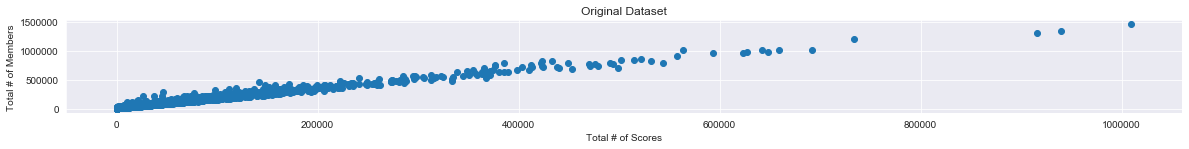

Predicted Model for Linear Regression


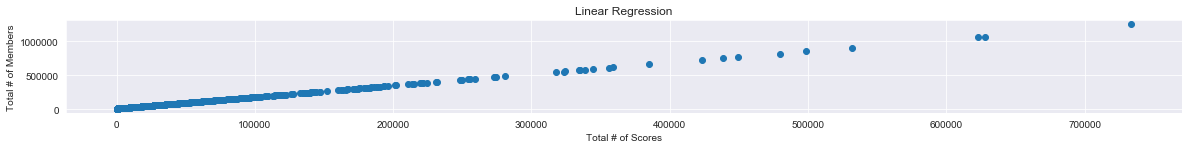

Predicted Cross Validation Model for Linear Regression


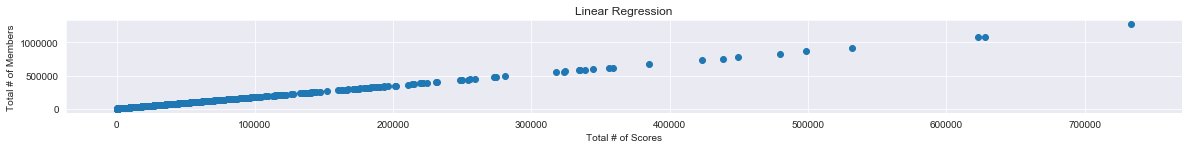

Predicted Model for Ridge Regression @ alpha = 0.01


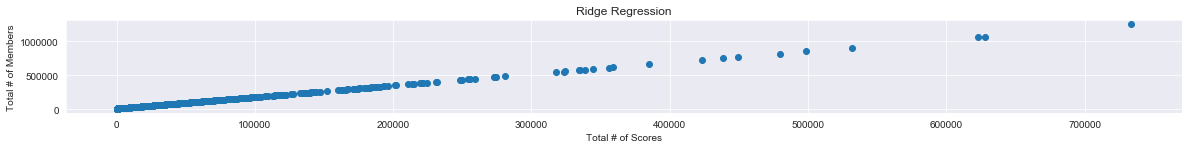

Predicted Model for Lasso Regression @ alpha = 0.01


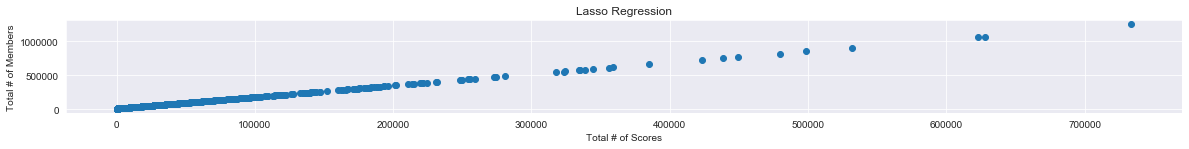

Predicted Model for K-nearest Neighbors Regression @ 1


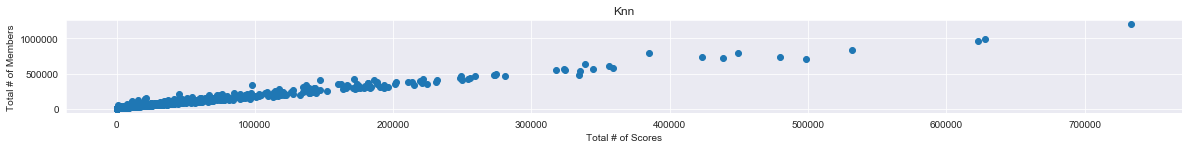

In [52]:
# ploting Linear Regression model
print('Original Dataset')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(811)
plt.scatter(X1,y1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Original Dataset')
plt.show()


# ploting Linear Regression model
print('Predicted Model for Linear Regression')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(812)
plt.scatter(X1_test,y1_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Linear Regression model
print('Predicted Cross Validation Model for Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(813)
plt.scatter(X1_test, cv_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()



# ploting Ridge Regression model
print('Predicted Model for Ridge Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(814)
plt.scatter(X1_test,y1_pred_rr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Ridge Regression')
plt.show()


# ploting Lasso Regression model
print('Predicted Model for Lasso Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(815)
plt.scatter(X1_test,y1_pred_lasso01)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Lasso Regression')
plt.show()


# ploting Knn model Neighbor=1
print('Predicted Model for K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(816)
plt.scatter(X1_test,y1_pred_knn)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Knn')
plt.show()


# # ploting Random Forest Classifier =1 Model
# print('Predicted Model for Random Forest Classifier @ N Estimators 100')

# fig1 = plt.figure(figsize=(20,16))
# ax1 = fig1.add_subplot(817)
# plt.scatter(X1_test,y1_pred_rf_1)
# plt.xlabel('Total # of Scores')
# plt.ylabel('Total # of Members')
# plt.title('Random Forest Classifier')
# plt.show()


# Rank against Score

In [53]:
#Assigning X and y values aswell as the train and test of X and y
X2 = rank.values.reshape(-1,1)
y2 = score.values.reshape(-1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=0)


In [54]:
#Linear Regression
lr = LinearRegression()
lr.fit(X2_train,y2_train)

y2_pred_lr = lr.predict(X2_test)

lr_accuracy_train2 = lr.score(X2_train,y2_train)

lr_accuracy_test2 = lr.score(X2_test,y2_test)
 
    
print(f'Linear Regression train accuracy is: {lr_accuracy_train2}\nLinear Regression test accuracy is: {lr_accuracy_test2}')


# Cross Validation - Linear Regression
lr_cross_val_score2 = cross_val_score(lr, X2,y2, cv=10)
lr_cv_score_avg2 = lr_cross_val_score2.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg2}')
cv_pred_lr2 = cross_val_predict(lr, X2_test, y2_test, cv=10)


Linear Regression train accuracy is: 0.8200742864543358
Linear Regression test accuracy is: 0.7813996347595746
Avg Cross Val Linear Regression is: 0.8165595808980379


In [55]:
X2_test.shape

(1894, 1)

In [56]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X2_train,y2_train)
y2_pred_rr = rr.predict(X2_test)

rr_accuracy_train2 = rr.score(X2_train,y2_train)

rr_accuracy_test2 = rr.score(X2_test,y2_test)
 
print(f'Ridge Regression(alpha=0.01) train accuracy is: {rr_accuracy_train2}\nRidge Regression(alpha=0.01) test accuracy is: {rr_accuracy_test2}')

rr100 = Ridge(alpha=.1)
rr100.fit(X2_train,y2_train)
y2_pred_rr100 = rr100.predict(X2_test)

rr100_accuracy_train2 = rr100.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100.score(X2_test,y2_test)
 
print(f'Ridge Regression(alpha=.001) train accuracy is: {rr100_accuracy_train2}\nRidge Regression(alpha=.001) test accuracy is: {rr100_accuracy_test2}')



Ridge Regression(alpha=0.01) train accuracy is: 0.8200742864543358
Ridge Regression(alpha=0.01) test accuracy is: 0.7813996347595674
Ridge Regression(alpha=.001) train accuracy is: 0.8200742864543358
Ridge Regression(alpha=.001) test accuracy is: 0.7813996347595035


In [57]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01.predict(X2_test)

lasso01_accuracy_train_2 = lasso01.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.8200742864427455
Lasso Regression @ alpha 0.01 test accuracy is: 0.7813995161083839
Lasso Regression @ alpha 0.00001 train accuracy is: 0.8200742864543357
Lasso Regression @ alpha 0.00001 test accuracy is: 0.781399634640934


Original Data


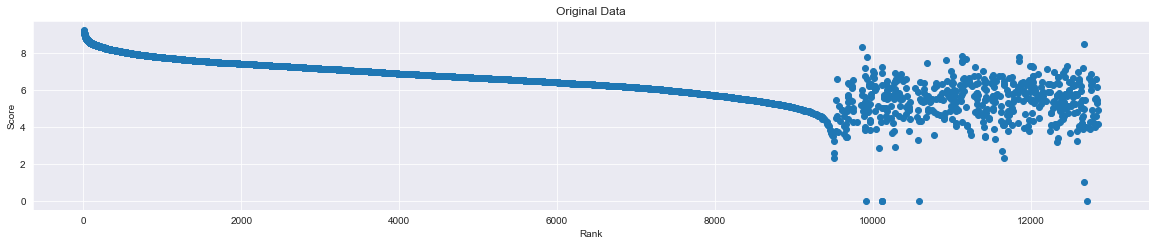

Predicted Model Linear Regression


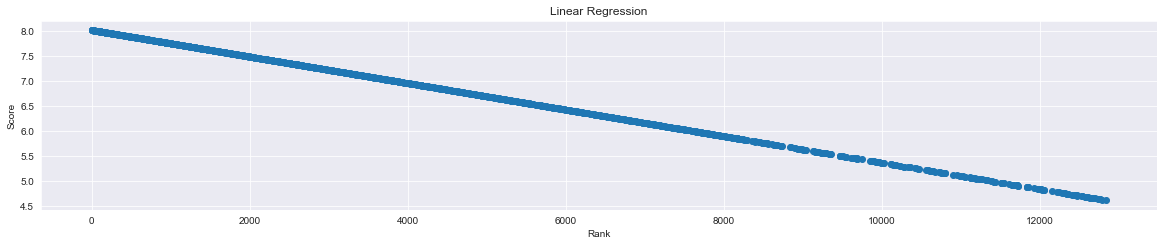

Predicted Cross Validation Model Linear Regression


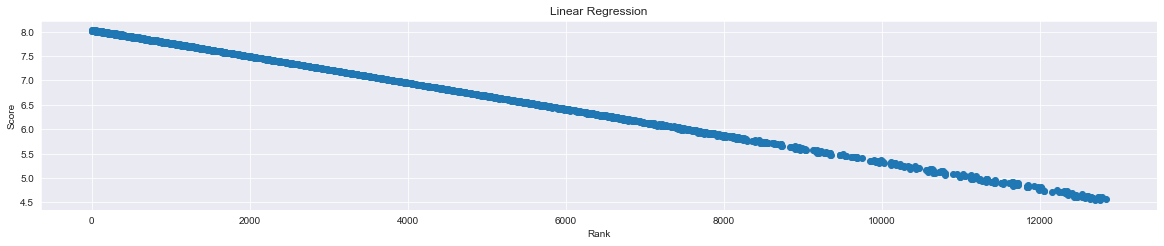

Predicted Model Ridge Regression


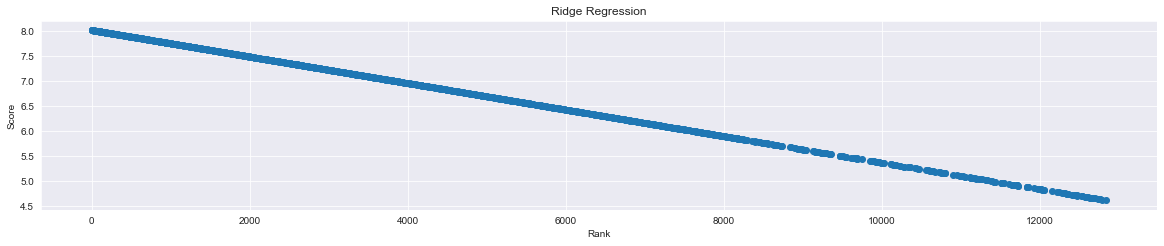

Predicted Model Lasso Regression


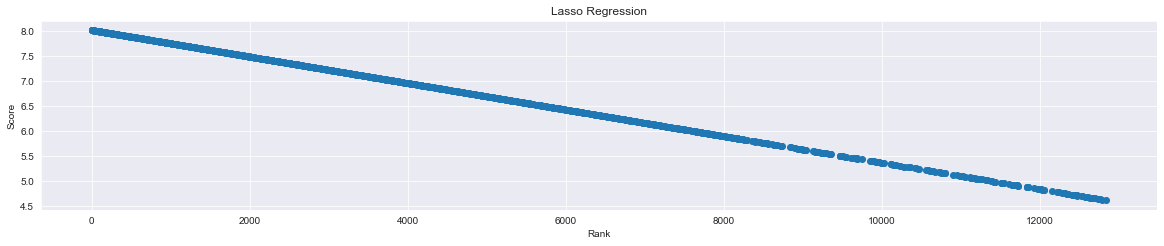

In [58]:
# ploting Linear Regression model

print('Original Data')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(413)
plt.scatter(X2,y2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Original Data')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_lr)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()

# ploting Ridge Regression model

print('Predicted Cross Validation Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,cv_pred_lr2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Ridge Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_rr)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Ridge Regression')
plt.show()

# ploting Lasoo Regression model

print('Predicted Model Lasso Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_lasso01)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Lasso Regression')
plt.show()

# Multiple Linear Regression

In [59]:
X = df.drop(['title','score'],axis=1)
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)


In [60]:
def multi_linear_regression_modeling(independent_variable,dependent_variable):
    #  fitting the independent variable(X) and the dependent variable(Y) to Linear Regression object (for easier calling)
    globals () ['mlr'] = LinearRegression().fit(independent_variable,dependent_variable)
    # assigning predictions to global variable (Yhat_mlr) to be called outside of function, using independent variable(X)
    globals() ['Yhat_mlr'] = mlr.predict(independent_variable)
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + 𝑏4 𝑋4 ...     ##
    # intercept (a)
    print(f'The intercept of the regression line is {mlr.intercept_}')
    # slope (b)
    print(f'The slopes of the regression line is {mlr.coef_}')
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... \nPlugging in the actual values the multiple linear regression formula:\033[0m')
    
    
    # printing the multiple linear regression formula with variables plugged in
    formula = (f'\033[1m{dependent_variable.name}\033[0m = {mlr.intercept_}')
    for i,col in enumerate(independent_variable.columns):
        slope_times_feature = f' + ({mlr.coef_[i]} * \033[1m{independent_variable.columns[i]}\033[0m)'
        formula += str(slope_times_feature)
    print(formula)   
    
    globals() ['r_square'] = mlr.score(independent_variable,dependent_variable)
    print(f'\n\n\033[1mThe R-square is: {r_square}\033[0m')
    print(f'We can say that \033[1m~{round(r_square*100,2)}%\033[0m of the variation of the {dependent_variable.name} is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    globals() ['mse'] = mean_squared_error(dependent_variable, Yhat_mlr)
    print(f'\033[1mThe mean square error of price and predicted values is: \033[0m', mse)
    
    
    plt.figure(figsize=(12, 10))
    ax1 = sns.distplot(dependent_variable, hist=False, color="r", label="Actual Value")
    sns.distplot(Yhat_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title(f'Actual vs Fitted Values for {dependent_variable.name.title()}')
    plt.xlabel(dependent_variable.name.title())
    plt.ylabel('Proportion of Anime')

    plt.show()
    plt.close()

The intercept of the regression line is 8.472626735946434
The slopes of the regression line is [ 1.71221826e-02 -1.97923941e-03  4.22802868e-04 -7.20841353e-03
 -2.77511937e-06 -2.59717588e-04  1.18190282e-05  2.08786579e-06
  9.37245504e-06  2.59293559e-03 -3.41625913e-04]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... 
Plugging in the actual values the multiple linear regression formula:
score = 8.472626735946434 + (0.01712218258934341 * type) + (-0.0019792394057766664 * source) + (0.00042280286812459154 * episodes) + (-0.0072084135326447914 * rating) + (-2.7751193733624316e-06 * scored_by) + (-0.00025971758839792795 * rank) + (1.1819028190696972e-05 * popularity) + (2.0878657896962385e-06 * members) + (9.372455042980606e-06 * favorites) + (0.0025929355949963775 * duration_min) + (-0.0003416259131009294 * aired_from_year)


The R-square is: 0.8184635508102259
We can say that ~81.85% of the variation of the score is explained by this multiple linear model fitted with ['type', 'source', 'e

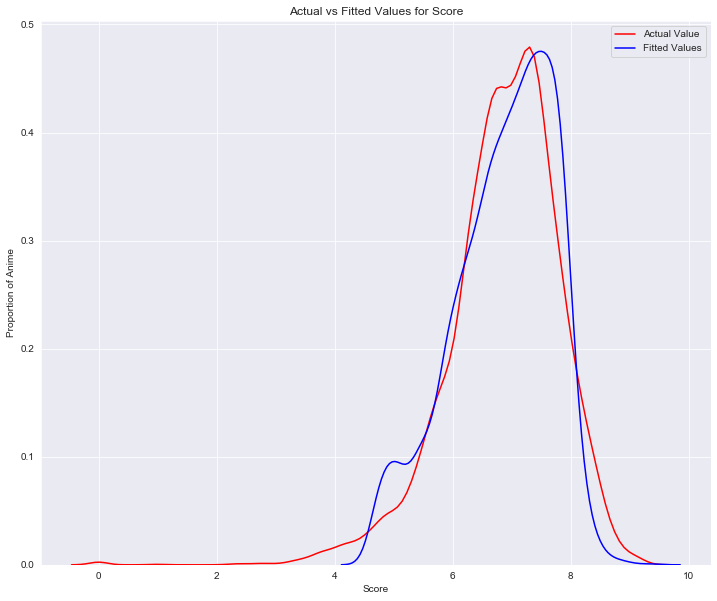

In [61]:
multi_linear_regression_modeling(X, y)

In [62]:
# function for multiple linear regression with cross validation

def cv_multi_linear_regression_modeling(independent_variable,dependent_variable,folds):
    globals () ['X_train', 'X_test', 'y_train', 'y_test'] = train_test_split(independent_variable,dependent_variable,test_size=0.3, random_state=3)
   
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    # fitting the independent variable(X) and the dependent variable(Y) to Linear Regression object (for easier calling)
    globals () ['mlr'] = LinearRegression()
    
    # assigning predictions to global variable (Yhat_mlr_cv) to be called outside of function, using X_train
    globals() ['Yhat_mlr_cv'] = cross_val_predict(mlr, X_train,y_train, cv = folds)
    
    # gets cross validation R^2 score 
    def get_cv_scores(model,folds):
        globals() ['cv_scores'] = cross_val_score(model,
                                                  X_train, 
                                                  y_train,
                                                  cv=folds,
                                                  scoring='r2')
    get_cv_scores(mlr,folds)
  
    globals() ['CV_r_square'] = np.mean(cv_scores)
    print(f'\n\n\033[1mThe Avg cross validation R-square (with {folds} folds) is: {CV_r_square}\033[0m')
    globals() ['STD'] = np.std(cv_scores)
    print(f'\n\033[1mWith a Standard Diviation of the R-squares: {STD}\n\033[0m')

    print(f'We can say that \033[1m~{round(CV_r_square*100,2)}%\033[0m of the variation of the {dependent_variable.name} is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    globals() ['mse'] = mean_squared_error(y_train, Yhat_mlr_cv)
    print(f'\033[1mThe mean square error of predicted values is: \033[0m', mse)
    
    
    mlr.fit(X_train,y_train)
    y_hat = mlr.predict(X_test)      #this gives me my predictions

    print(f"\nThe model's performance score is {mlr.score(X_test, y_test)}")     #this tells me my model performance

    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n    ##
    # intercept (a)
    print(f'\n\nThe intercept of the regression line is {mlr.intercept_}')
    # slope (b)
    print(f'The slopes of the regression line are {mlr.coef_}')
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n \nPlugging in the actual values the multiple linear regression formula:\033[0m')
    
    # printing the multiple linear regression formula with variables plugged in 
    formula = (f'\033[1m[{dependent_variable.name.upper()}]\033[0m = {mlr.intercept_}')
    for i,col in enumerate(independent_variable.columns):
        slope_times_feature = f' + ({mlr.coef_[i]} * \033[1m{independent_variable.columns[i]}\033[0m)'
        formula += str(slope_times_feature)
    print(formula) 
  
    #plotting differences betwwen actual and predicted values
    
    plt.figure(figsize=(12, 10))
    #plotting actual target values
    ax1 = sns.distplot(dependent_variable, hist=False, color="r", label="Actual Value")
    #plotting predicted target values
    sns.distplot(Yhat_mlr_cv, hist=False, color="b", label="Cross Validation Fitted Values" , ax=ax1)
    sns.distplot(y_hat, hist=False, color="m", label="Fitted Values" , ax=ax1)
    
    plt.title(f'Actual vs Fitted Values for {dependent_variable.name.title()}')
    plt.xlabel(dependent_variable.name.title())
    plt.ylabel('Proportion based on total count')
    plt.show()
    plt.close()
    
  



The Avg cross validation R-square (with 5 folds) is: 0.8200950165333447

With a Standard Diviation of the R-squares: 0.03567209850703259

We can say that ~82.01% of the variation of the score is explained by this multiple linear model fitted with ['type', 'source', 'episodes', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'duration_min', 'aired_from_year'].

The mean square error of predicted values is:  0.16348931643629774

The model's performance score is 0.8074600711513504


The intercept of the regression line is 6.876735224810314
The slopes of the regression line are [ 8.81183037e-03 -2.55348710e-03  1.75131774e-03 -2.13228266e-03
 -2.89433605e-06 -2.59667776e-04  9.85415018e-06  2.06741877e-06
  9.92708478e-06  2.37689537e-03  4.62591015e-04]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n 
Plugging in the actual values the multiple linear regression formula:
[SCORE] = 6.876735224810314 + (0.008811830374222642 * type) + (-0.0025534871023349466 * source

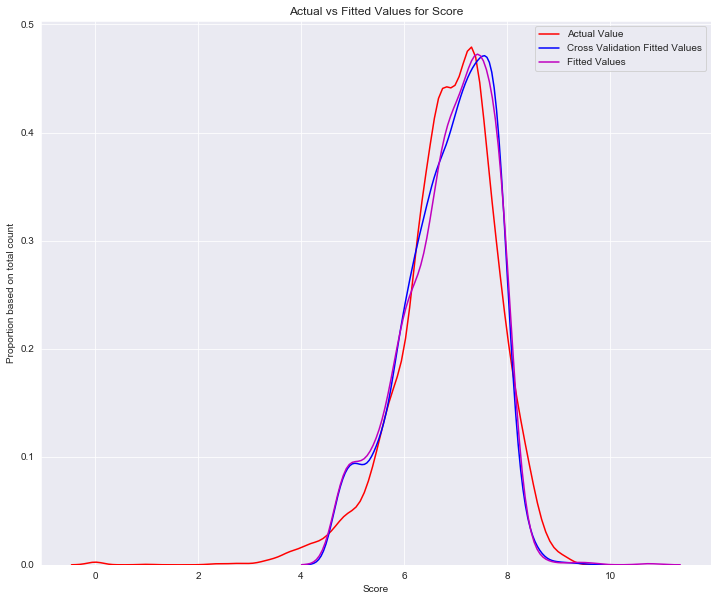

In [63]:
cv_multi_linear_regression_modeling(X, y, 5)

R-square is: 0.8183936035825073
mean square error is:  0.16209149042806653



The Avg cross validation R-square (with 50 folds) is: 0.8260895040316654

With a Standard Diviation of the R-squares: 0.08583498510437454

We can say that ~82.61% of the variation of the score is explained by this multiple linear model fitted with ['type', 'source', 'episodes', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'duration_min', 'aired_from_year'].

The mean square error of predicted values is:  0.16340820527536837

The model's performance score is 0.8074600711513504


The intercept of the regression line is 6.876735224810314
The slopes of the regression line are [ 8.81183037e-03 -2.55348710e-03  1.75131774e-03 -2.13228266e-03
 -2.89433605e-06 -2.59667776e-04  9.85415018e-06  2.06741877e-06
  9.92708478e-06  2.37689537e-03  4.62591015e-04]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n 
Plugging in the actual values the multiple linear regression formula:
[SCORE] = 6.876735224810314 + (0.008811830374222642 * type) + (-0.0025534871023349466 * sourc

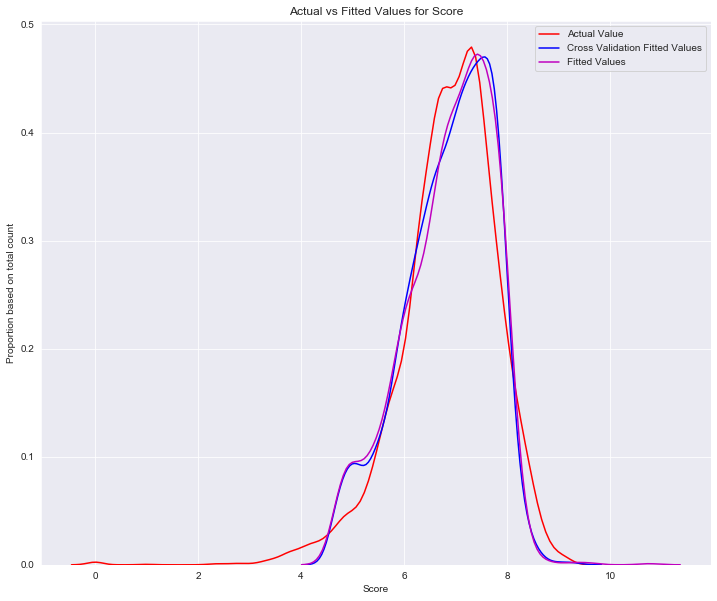

In [64]:
cv_multi_linear_regression_modeling(X, y,50)

In [65]:
coeff = pd.DataFrame()
coeff["Columns"] = X_train.columns
coeff["Linear_Regession_Coefficients"] = pd.Series(mlr.coef_)
coeff

,Columns,Linear_Regession_Coefficients
0,type,0.008812
1,source,-0.002553
2,episodes,0.001751
3,rating,-0.002132
4,scored_by,-0.000003
5,rank,-0.000260
6,popularity,0.000010
7,members,0.000002
8,favorites,0.000010
9,duration_min,0.002377


# GridSearch 

## Ridge Regression GridSearch

In [66]:
from scipy.stats import loguniform

# find optimal alpha with grid search

space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
grid_rr = GridSearchCV(Ridge(random_state=3), space, scoring='r2', verbose=1, n_jobs=-1,cv=50)
grid_result_rr = grid_rr.fit(X_train, y_train)
print('Best Score: ', grid_result_rr.best_score_)
print('Best Params: ', grid_result_rr.best_params_)

Fitting 50 folds for each of 160 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 2257 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3852 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 5691 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 7745 tasks      | elapsed:  4.4min


Best Score:  0.8262396895821144
Best Params:  {'alpha': 10000, 'fit_intercept': True, 'normalize': False, 'solver': 'svd'}


[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  4.8min finished


In [67]:

coeff["Ridge_Regession_Coefficients"] = pd.Series(grid_result_rr.best_estimator_.coef_)
coeff

,Columns,Linear_Regession_Coefficients,Ridge_Regession_Coefficients
0,type,0.008812,0.003625
1,source,-0.002553,-0.001967
2,episodes,0.001751,0.001849
3,rating,-0.002132,-0.000670
4,scored_by,-0.000003,-0.000003
5,rank,-0.000260,-0.000260
6,popularity,0.000010,0.000010
7,members,0.000002,0.000002
8,favorites,0.000010,0.000010
9,duration_min,0.002377,0.002168


## Lasso Regression GridSearch

In [68]:

# find optimal alpha with grid search

param_grid ={'alpha': [0,0.00001, 0.0001, 0.001, 0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'normalize': [True,False],
            'fit_intercept': [True,False]}

grid_lasso = GridSearchCV(Lasso(random_state=3), param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=50)
grid_result_lasso = grid_lasso.fit(X_train, y_train)
print(f'Best Score: {grid_result_lasso.best_score_}')
print(f'Best Params: {grid_result_lasso.best_params_}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 50 folds for each of 68 candidates, totalling 3400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   41.9s


Best Score: 0.826447509941368
Best Params: {'alpha': 0.15, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done 3400 out of 3400 | elapsed:  1.1min finished


In [69]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [70]:
Lasso().get_params().values()

dict_values([1.0, True, True, 1000, False, False, False, None, 'cyclic', 0.0001, False])

In [71]:
coeff["Lasso_Regession_Coefficients"] = pd.Series(grid_result_lasso.best_estimator_.coef_)
coeff

,Columns,Linear_Regession_Coefficients,Ridge_Regession_Coefficients,Lasso_Regession_Coefficients
0,type,0.008812,0.003625,0.000000
1,source,-0.002553,-0.001967,-0.000000
2,episodes,0.001751,0.001849,0.001579
3,rating,-0.002132,-0.000670,-0.000000
4,scored_by,-0.000003,-0.000003,-0.000003
5,rank,-0.000260,-0.000260,-0.000261
6,popularity,0.000010,0.000010,0.000009
7,members,0.000002,0.000002,0.000002
8,favorites,0.000010,0.000010,0.000010
9,duration_min,0.002377,0.002168,0.001710


## Elastic Net Regression GridSearch

In [72]:
from sklearn.linear_model import ElasticNet

# find optimal alpha with grid search

param_grid ={'alpha': [0,0.00001, 0.0001, 0.001, 0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'normalize': [True,False],
            'fit_intercept': [True,False],
            'l1_ratio': np.arange(0.0, 1.0, 0.1)}

grid_e_net = GridSearchCV(ElasticNet(random_state=3), param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=50)
grid_result_e_net = grid_e_net.fit(X_train, y_train)
print(f'Best Score: {grid_result_e_net.best_score_}')
print(f'Best Params: {grid_result_e_net.best_params_}')



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 50 folds for each of 680 candidates, totalling 34000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3065 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3817 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5429 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 7438 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 9324 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 11310 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 13379 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 15879 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 19336 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 21724 tasks      | elapsed:

Best Score: 0.8264477136356061
Best Params: {'alpha': 0.7, 'fit_intercept': True, 'l1_ratio': 0.2, 'normalize': False}


In [73]:
coeff["Elastic_Net_Regession_Coefficients"] = pd.Series(grid_result_e_net.best_estimator_.coef_)
coeff

,Columns,Linear_Regession_Coefficients,Ridge_Regession_Coefficients,Lasso_Regession_Coefficients,Elastic_Net_Regession_Coefficients
0,type,0.008812,0.003625,0.000000,0.000000
1,source,-0.002553,-0.001967,-0.000000,-0.000000
2,episodes,0.001751,0.001849,0.001579,0.001598
3,rating,-0.002132,-0.000670,-0.000000,-0.000000
4,scored_by,-0.000003,-0.000003,-0.000003,-0.000003
5,rank,-0.000260,-0.000260,-0.000261,-0.000261
6,popularity,0.000010,0.000010,0.000009,0.000009
7,members,0.000002,0.000002,0.000002,0.000002
8,favorites,0.000010,0.000010,0.000010,0.000010
9,duration_min,0.002377,0.002168,0.001710,0.001728


##  Stochastic Gradient Descent Regression GridSearch

In [75]:
from sklearn.linear_model import SGDRegressor

# find optimal alpha with grid search

param_grid ={'alpha': [0.00001, 0.0001, 0.001, 0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'normalize': [True,False],
            'fit_intercept': [True,False],
            'l1_ratio': np.arange(0.0, 1.0, 0.1),
            'penalty': ['l2', 'l1', 'elasticnet']}

grid_sgd = GridSearchCV(SGDRegressor(random_state=3), param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=50)
grid_result_sgd = grid_sgd.fit(X_train, y_train)
print(f'Best Score: {grid_result_sgd.best_score_}')
print(f'Best Params: {grid_result_sgd.best_params_}')



Fitting 50 folds for each of 1920 candidates, totalling 96000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: Invalid parameter normalize for estimator SGDRegressor(alpha=1e-05, l1_ratio=0.0, random_state=3). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
coeff["Stochastic_Gradient_Descent_Regession_Coefficients"] = pd.Series(grid_result_sgd.best_estimator_.coef_)
coeff

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))



param_grid = {'polynomialfeatures__degree': np.arange(20),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=25)
grid.fit(X, y)

model = grid.best_estimator_

y_test = model.fit(X, y).predict(X_test)

# plt.scatter(X, y)
# plt.plot(X_test.ravel(), y_test, 'r')

C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\sdman\Anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\sdman\Anaconda

C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 296, in _fit
    **fit_params_steps[name])
  File "C:\Users\sdman\Anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\sdman\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\sdman\Anaconda

KeyboardInterrupt: 

In [82]:
pipe = make_pipeline(
    ('poly', PolynomialFeatures(include_bias=False),
    ('model', LinearRegression())

GridSearchCV(pipe,param_grid={'poly__degree': list(pows)},scoring='neg_mean_squared_error',cv=LeaveOneOut())
                    
                        
    

poly_grid.fit(X, y)

first = -search.cv_results_['mean_test_score']

SyntaxError: invalid syntax (<ipython-input-82-f31d35d7f840>, line 5)

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

scaler = preprocessing.StandardScaler()
polyreg_scaled=make_pipeline(PolynomialFeatures(),scaler,LinearRegression())


param_grid ={'polynomialfeatures__degree': np.arange(2, 6)}
poly_grid=GridSearchCV(polyreg_scaled, param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1,cv=50)
poly_grid.fit(X_train, y_train)
print(f'Best Score: {poly_grid.best_score_}')
print(f'Best Params: {poly_grid.best_params_}')

Fitting 50 folds for each of 4 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 29.3min


Best Score: -0.13665795771680225
Best Params: {'polynomialfeatures__degree': 2}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 36.0min finished


# Predicting - Manually inputted Anime info (Not in dataset) 

In [ ]:
def anime_predict_score(anime_info,X,y):
    
    # function to get string of anime's title from anime's info variables 
    def namestr(obj, namespace):
        name = str([name for name in namespace if namespace[name] is obj]).replace("_"," ").title()
        return name[2:-2]
    title = namestr(anime_info, globals())
    
    
    ##           Fitting complete data to models for predicting               ##
    
    # Multi-Linear Regression
    mlr.fit(X,y)
    print(f"{title}'s predicted anime score (using Linear Regression) is: {mlr.predict(anime_info)}")
    
    # Ridge Linear Regression (GridSearch with best parameters)
    ridge = Ridge(**grid_result_rr.best_params_,random_state=3)
    ridge.fit(X,y)
    print(f"{title}'s predicted anime score (using Ridge Regression) is: {ridge.predict(anime_info)}")
    
    # Lasso Linear Regression (GridSearch with best parameters)
    lasso = Lasso(**grid_result_lasso.best_params_,random_state=3)
    lasso.fit(X,y)
    print(f"{title}'s predicted anime score (using Lasso Regression) is: {lasso.predict(anime_info)}")
    
    # Elastic Net Linear Regression (GridSearch with best parameters)
    e_net = ElasticNet(**grid_result_e_net.best_params_,random_state=3)
    e_net.fit(X,y)
    print(f"{title}'s predicted anime score (using Elastic Net Regression) is: {e_net.predict(anime_info)}")
    
    # Stochastic Gradient Descent Regression (GridSearch with best parameters)
    sgd = SGDRegressor(**grid_result_sgd.best_params_,random_state=3)
    X = scaler.transform(X)
    sgd.fit(X,y)
    print(f"{title}'s predicted anime score (using Stochastic Gradient Descent Regression) is: {scaler.inverse_transform(sgd.predict(anime_info))}")
    
    # display image of actual score from myAnimelist.com
    print('\n\nScreenshot taken from myAnimelist.com of the actual score')
    img = plt.imread(f'images/{title}.jpg')
    plt.figure(figsize = (35,40))
    plt.imshow(img)

### running anime Vinland Saga's information through my model

In [ ]:
vinland_saga = [[5,6,24,4,363439,41,134,737881,20182,24.0,2019]]

anime_predict_score(vinland_saga, X,y)

### running anime Demon Slayer's information through my model

In [ ]:
demon_slayer = [[5,6,26,4,966203,63,22,1567326,72436,23.0,2019]]

anime_predict_score(demon_slayer, X,y)

### running anime Dororo's information through my model

In [ ]:
dororo = [[5,6,24,4,341122,322,137,730890,12071,24.0,2019]]

anime_predict_score(dororo, X,y)

### running anime Attack on Titan: Season 3's information through my model

In [ ]:
Attack_on_Titan_season_3 = [[5,6,12,4,877466,64,32,1370047,17234,23.0,2018]]

anime_predict_score(Attack_on_Titan_season_3, X,y)

### running anime My Hero Academia: Season 3's information through my model

In [ ]:
my_hero_season_3 = [[5,6,25,3,916942,294,30,1452482,14255,23.0,2018]]

anime_predict_score(my_hero_season_3, X,y)

### running anime Jujutsu Kaisen's information through my model

In [ ]:
jujutsu_kaisen = [[5,6,24,4,441907,26,85,955531,39622,23.0,2020]]

anime_predict_score(jujutsu_kaisen, X,y)

### running anime Mob Psycho 100: Season 2's information through my model

In [ ]:
mob_psycho_100_season_2 = [[5,14,13,3,542236,22,99,903843,22297,24.0,2019]]

anime_predict_score(mob_psycho_100_season_2, X,y)

In [ ]:
X.columns